Step 4 and 5 of the sprint 8 proyect.  

Step 4. Instructions:
1. Load the packages

2. Review datatype usage and data structure.

3. Tendencies. Look for the top 10 most visited neighborhoods.

4. Data visualization. 1. Amount of trips by company. 10 main neighborhoods by the number of ending trips. 

In [18]:
#Load Packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import mannwhitneyu

#Import data
companies_and_trips = pd.read_csv("moved_project_sql_result_01.csv")
dropoff_locations_and_avgtrips = pd.read_csv("moved_project_sql_result_04.csv")
time_and_weather = pd.read_csv("moved_project_sql_result_07.csv")

#Datatype and data structure review
companies_and_trips.info()
print(companies_and_trips.head())
print()
print()
dropoff_locations_and_avgtrips.info()
print(dropoff_locations_and_avgtrips.head())
print()
print()
time_and_weather.info()
print(time_and_weather.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                 Medallion Leasin         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
  dropoff_location_nam

Is the data type usage correct? 
Only the start_ts, a variable of time, is incorrectly set to an object while it must be a timestamp type. start_ts is in the time_and_weather dataframe.

In [19]:
#Modifying incorrect datatype setting. 
time_and_weather["start_ts"] = pd.to_datetime(time_and_weather["start_ts"]) 
time_and_weather.info() #Correctly set to datetime.
print(time_and_weather.head()) #review datetime format. No information lost.
print("Datetime datatype is correctly set")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0
Datetime datatype is correctly set


In [20]:
#Finding the most visited neighborhoods
#drop_off_location_and_avgtrips al ready has the information needed to know which neighborhood has the most trips ending only an order by descendent is missing.
top10neighborhoods = dropoff_locations_and_avgtrips.sort_values(by = "average_trips", ascending=False).head(10)
top10neighborhoods["average_trips"] = top10neighborhoods["average_trips"].round().astype(int) #removes decimals by regular rounding.
print(top10neighborhoods)

  dropoff_location_name  average_trips
0                  Loop          10727
1           River North           9524
2         Streeterville           6665
3             West Loop           5164
4                O'Hare           2547
5             Lake View           2421
6            Grant Park           2069
7         Museum Campus           1510
8            Gold Coast           1364
9    Sheffield & DePaul           1260


Trips volume by Cab Companies


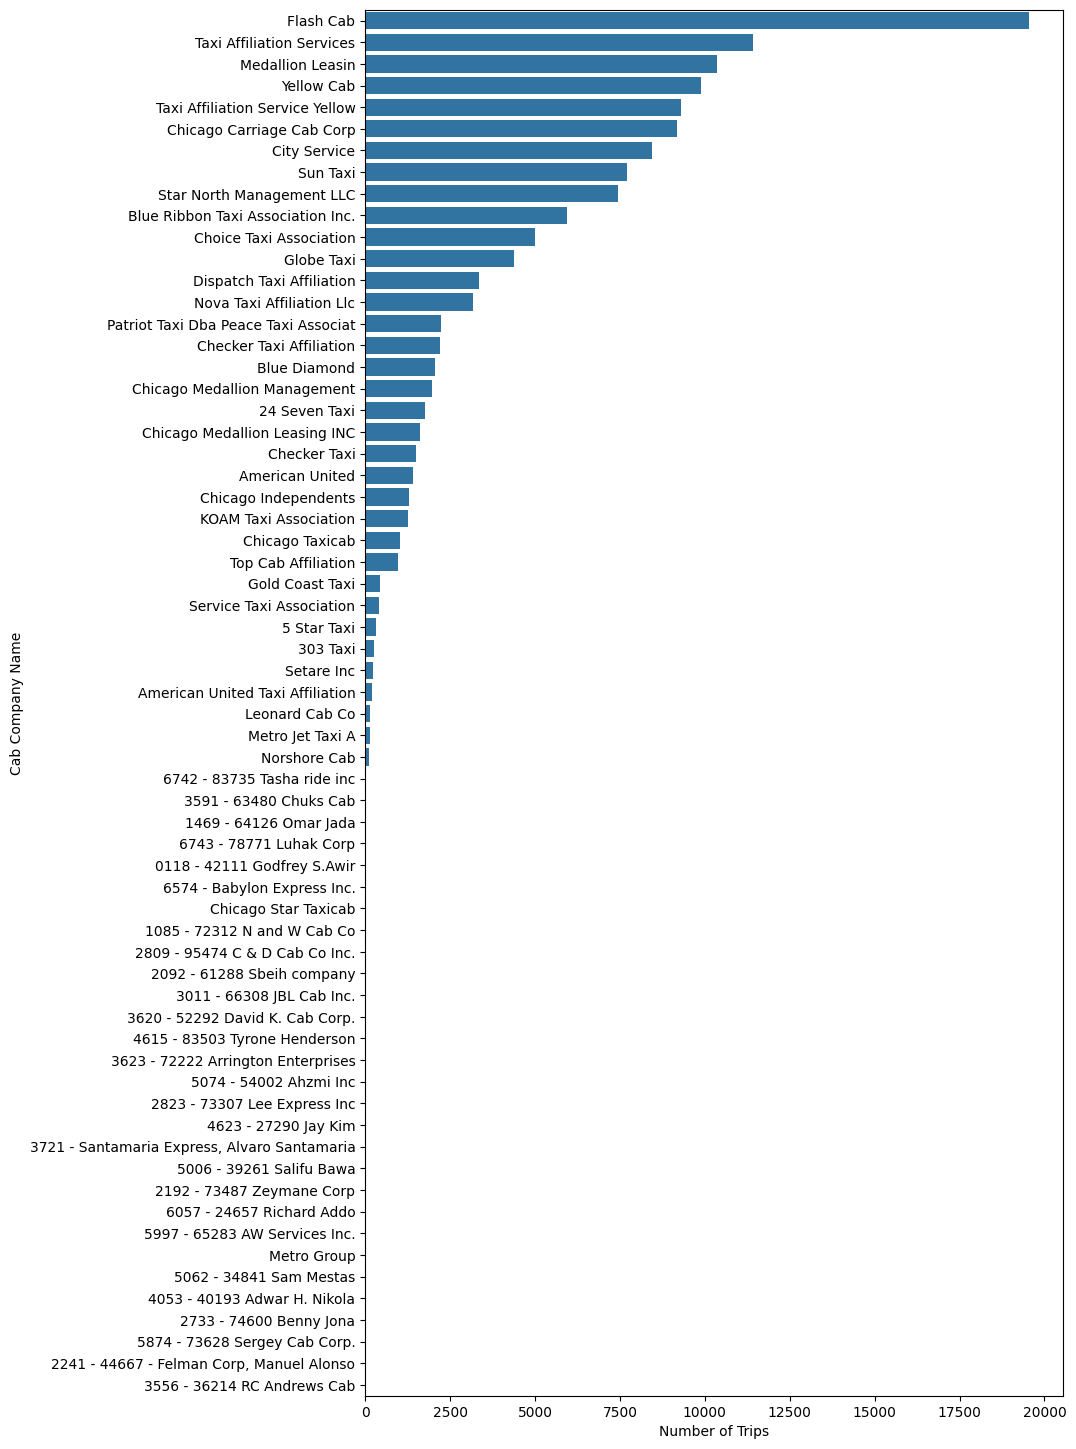

About half of the cab companies provided no service in the present data. Flash cab appears to be the leading cab service company.


In [21]:
#Data visualization: Amount of trips by company 
print("Trips volume by Cab Companies")
plt.figure(figsize=(9, 18))
sns.barplot(data = companies_and_trips, x="trips_amount", y= "company_name") 
#The axis of the variables were changed to improve reading of the company name 

plt.xlabel("Number of Trips")
plt.ylabel("Cab Company Name")
plt.show()
print("About half of the cab companies provided no service in the present data. Flash cab appears to be the leading cab service company.")

Top 10 neighborhoods with most arrivals by cab trips


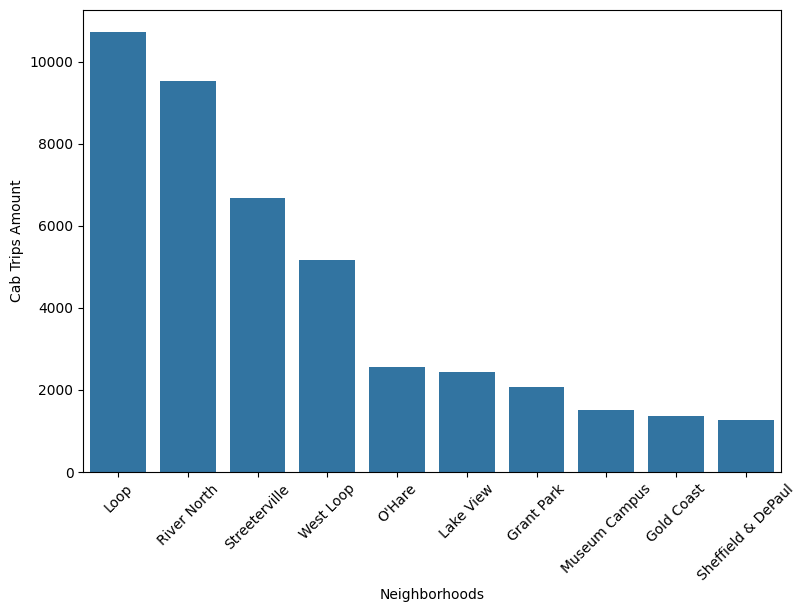

Clearly not a normal distribution some places really use cab services a lot more. 
There are 94 locations and by the fifth top trips dropoff location the amount of 
trips divided by half. 
Understanding the context of less consumption of cab services 
and what is attracting such a remarkable amount of trips for the first 4 locations 
would further enrich the analysis.


In [22]:
#Data visualization
print("Top 10 neighborhoods with most arrivals by cab trips")
plt.figure(figsize=(9, 6))
sns.barplot(data = top10neighborhoods, x="dropoff_location_name", y= "average_trips") 
#The axis of the variables were changed to improve reading of the company name 

plt.xlabel("Neighborhoods")
plt.ylabel("Cab Trips Amount")
plt.xticks(rotation=45)
plt.show()
print("Clearly not a normal distribution some places really use cab services a lot more. ")
print("There are 94 locations and by the fifth top trips dropoff location the amount of \ntrips divided by half. \nUnderstanding the context of less consumption of cab services \nand what is attracting such a remarkable amount of trips for the first 4 locations \nwould further enrich the analysis.")

Paso 5. Hypothesis testing. 
Hypothesis
The average trip duration from the Loop to the International Airport of O'Hare differs on rainy saturdays.

In [38]:
#Postulate the hypothesis
print("Null: The average trip duration from the Loop to the International Airport of O'hare does not differ on rainy saturdays. \nAlternative: The average trip duration from the Loop to the International Airport of O'hare differs on rainy saturdays.")
#Make the slices of data to be tested. Assuming the data is a SQL extract of trips going from the Loop to the international airport of O'hare.
#So I require to select saturday's data and split by weather either good or bad. The duration is what will be compared. 
time_and_weather #Column's names: 'start_ts', 'weather_conditions', 'duration_seconds'
saturday = time_and_weather[time_and_weather["start_ts"].dt.day_name() == "Saturday"]
good_weather = saturday[saturday["weather_conditions"] == "Good"]["duration_seconds"]
bad_weather = saturday[saturday["weather_conditions"] == "Bad"]["duration_seconds"]
#Hypothesis testing
#Is it normally distributed? shaphiro-wilkins testing. 
stat, pvalue = st.shapiro(good_weather)
print()
print(f"Shapiro value for trip duration normality from the Loop to O'Hare under good weather on saturdays: {stat}, pvalue: {pvalue}")
print()
stat, pvalue = st.shapiro(bad_weather)
print(f"Shapiro value for trip duration normality from the Loop to O'Hare under bad weather on saturdays: {stat}, pvalue: {pvalue}")
print()
print("No normality for duration of trips under both conditions, both pvalues <0.05 in the shapiro wilkins normality test. \nHypothesis testing will continue with Mannwhitney test.")
#The Shapiro normality test failed. As there is no normality hypothesis testing will proceed in a non parametric manner. 

#Mannwhitney test
#Significance level 0.05
alpha = 0.05
duration_comparison_by_weather = mannwhitneyu(good_weather, bad_weather)
print("Mannwhitney pvalue:", duration_comparison_by_weather.pvalue)
print()
print("Differences in duration of trips from the Loop to O'hare Airport on saturdays under weather conditions variation according to Mannwhitney test:")
if duration_comparison_by_weather.pvalue < alpha: 
    print("Reject Null Hipothesis")
    print("The average trip duration from the Loop to the International Airport of O'hare differs on rainy saturdays.")
else: 
    print("Null Hipothesis is not rejected")
    print("The average trip duration from the Loop to the International Airport of O'hare does not differ on rainy saturdays.")
    
mean_good_weather = good_weather.mean()
mean_bad_weather = bad_weather.mean()
print(f"Mean of good and bad weather respectively: \nGood weather:{round(mean_good_weather)} seconds \nBad weather:{round(mean_bad_weather)} seconds")

print("Conclusion:\nThe weather on saturdays seems to influence the duration of trips from the Loop to O'Hare international airport according to manwhitney hypothesis testing. \nAccording to a mean of the duration of trips under each condition, good weather has a 427 seconds lower average duration of each trip.\nIt is safe to say that bad weather condition increases trip duration from the Loop to the O'Hare Airport.")



Null: The average trip duration from the Loop to the International Airport of O'hare does not differ on rainy saturdays. 
Alternative: The average trip duration from the Loop to the International Airport of O'hare differs on rainy saturdays.

Shapiro value for trip duration normality from the Loop to O'Hare under good weather on saturdays: 0.9096231562627488, pvalue: 1.5534200109332634e-22

Shapiro value for trip duration normality from the Loop to O'Hare under bad weather on saturdays: 0.9762436077644514, pvalue: 0.0036121201564423976

No normality for duration of trips under both conditions, both pvalues <0.05 in the shapiro wilkins normality test. 
Hypothesis testing will continue with Mannwhitney test.
Mannwhitney pvalue: 6.716538885593458e-14

Differences in duration of trips from the Loop to O'hare Airport on saturdays under weather conditions variation according to Mannwhitney test:
Reject Null Hipothesis
The average trip duration from the Loop to the International Airport of O'